## 题目：寻找关键用户和分析社交关系

### data.json 数据描述
#### 1. 用户节点数据包含用户ID和他们的"影响力分数"，格式为["用户名称", 影响力分数]。
#### 2. 边关系数据包含每两个用户之间的连接强度（即边的权重），格式为["用户名称1", "用户名称2", 关系权重]。
例如：
- 节点：["Yanyan-Wang", 50.95], ["Aarebecca", 23.82], ...
- 边：["Yanyan-Wang", "Aarebecca", 25.3], ["Yanyan-Wang", "pomelo-nwu", 25.09], ...

### 问题
#### 1. 社交网络构建与分析
- a. 使用邻接矩阵或者字典表示法来表示这个社交关系网络。
- b. 请找出每个用户的直接朋友（即与其存在边关系的节点），并用列表形式列出。

#### 2. 统计与度中心性分析
- a. 计算每个用户的度数（即直接朋友数量），列出度数最多的前5个用户及其朋友数量。
- b. 通过影响力分数（如上所示），找出影响力最高的前5个用户。
- c. 综合考虑影响力分数和朋友数量，列出对社交网络最有影响力的用户（可以选择将两者按一定比例加权，例如影响力得分的50%和朋友数量的50%）。

#### 3. 推荐新朋友
- a. 对于用户 Yanyan-Wang，请找出其“朋友的朋友”中最有可能成为新朋友的用户，并列出推荐的理由（例如有最多共同的朋友）。
- b. 考虑用户之间的连接强度，找出与 Yanyan-Wang 连接强度最高的5个用户（无论是否已经是直接朋友），并列出推荐排序。
 
#### 4. 网络图的可视化
- a. 使用图论可视化工具绘制用户关系网络图，展示关键用户和他们的连接情况。
- b. 你可以对图中的节点按“影响力得分”进行着色，节点的大小则代表度数，尝试解释在图中哪些用户在社交网络中最具影响力。

#### 1. 社交网络构建与分析
- a. 使用邻接矩阵或者字典表示法来表示这个社交关系网络。
- b. 请找出每个用户的直接朋友（即与其存在边关系的节点），并用列表形式列出。

In [2]:
import json

# 读取 JSON 文件
file_path = r"C:\Users\王志鸿\Desktop\导论\hw4_data.json"

# 加载 JSON 数据
with open(file_path, 'r', encoding='utf-8') as f:
    data = json.load(f)

# 从 JSON 数据中获取节点和边的信息
nodes = data['nodes']
edges = data['edges']

# 1. 构建社交网络的邻接表
social_network = {}

# 初始化网络：将每个用户添加到社交网络中，默认用户的朋友列表为空
for node in nodes:
    user, _ = node  # 提取用户名和影响力分数
    social_network[user] = []

# 添加边信息（用户之间的连接）
for edge in edges:
    user1, user2, strength = edge  # 提取两个用户和它们之间的连接强度
    social_network[user1].append(user2)
    social_network[user2].append(user1)

# 2. 找出每个用户的直接朋友
def find_direct_friends(user):
    return social_network.get(user, [])

# 输出每个用户的直接朋友
for user in social_network:
    friends = find_direct_friends(user)
    print(f"{user} 的直接朋友是: {friends}")


Yanyan-Wang 的直接朋友是: ['Aarebecca', 'pomelo-nwu', 'yangzy0603', 'tyn1998', 'yvonneyx', 'lidongze0629', 'RackweLLizm', 'yikenie', 'yubo0923', 'Maple0817', 'wj23027', 'frank-zsy', 'andyhuang18', 'bifenglin']
Aarebecca 的直接朋友是: ['Yanyan-Wang', 'pomelo-nwu', 'yangzy0603', 'yvonneyx', 'lidongze0629', 'tyn1998', 'RackweLLizm', 'yikenie', 'yubo0923', 'Maple0817', 'frank-zsy']
pomelo-nwu 的直接朋友是: ['Yanyan-Wang', 'Aarebecca', 'yangzy0603', 'tyn1998', 'lidongze0629', 'yvonneyx', 'RackweLLizm', 'yikenie', 'bifenglin', 'frank-zsy', 'yubo0923', 'wj23027', 'andyhuang18', 'Maple0817', 'will-ww', 'zhicheng-ning', 'PureNatural', 'xiaoya-yaya', 'xgdyp', 'longyanz', 'Zzzzzhuzhiwei', 'birdflyi', 'lhbvvvvv', 'zhaosj975']
tyn1998 的直接朋友是: ['andyhuang18', 'pomelo-nwu', 'frank-zsy', 'wj23027', 'bifenglin', 'Yanyan-Wang', 'will-ww', 'Zzzzzhuzhiwei', 'lhbvvvvv', 'zhicheng-ning', 'PureNatural', 'yangzy0603', 'xgdyp', 'stevending1st', 'wxharry', 'Aarebecca', 'birdflyi', 'xiaoya-yaya', 'pranavshuklaa', 'lidongze0629', 

#### 2. 统计与度中心性分析
- a. 计算每个用户的度数（即直接朋友数量），列出度数最多的前5个用户及其朋友数量。
- b. 通过影响力分数（如上所示），找出影响力最高的前5个用户。
- c. 综合考虑影响力分数和朋友数量，列出对社交网络最有影响力的用户（可以选择将两者按一定比例加权，例如影响力得分的50%和朋友数量的50%）。

In [3]:
import json

# 读取 JSON 文件
file_path = r"C:\Users\王志鸿\Desktop\导论\hw4_data.json"

# 加载 JSON 数据
with open(file_path, 'r', encoding='utf-8') as f:
    data = json.load(f)

# 从 JSON 数据中获取节点和边的信息
nodes = data['nodes']
edges = data['edges']

# 1. 构建社交网络的邻接表
social_network = {}

# 初始化网络：将每个用户添加到社交网络中，默认用户的朋友列表为空
for node in nodes:
    user, _ = node  # 提取用户名和影响力分数
    social_network[user] = []

# 添加边信息（用户之间的连接）
for edge in edges:
    user1, user2, strength = edge  # 提取两个用户和它们之间的连接强度
    social_network[user1].append(user2)
    social_network[user2].append(user1)

# 2. 计算每个用户的度数（直接朋友数量）
degree = {user: len(friends) for user, friends in social_network.items()}

# 3. 根据度数找到度数最多的前5个用户
top_5_degree = sorted(degree.items(), key=lambda x: x[1], reverse=True)[:5]
print("度数最多的前5个用户及其朋友数量:")
for user, deg in top_5_degree:
    print(f"{user}: {deg}个朋友")

# 4. 获取每个用户的影响力分数
influence_scores = {user: score for user, score in nodes}

# 5. 根据影响力分数找到影响力最高的前5个用户
top_5_influence = sorted(influence_scores.items(), key=lambda x: x[1], reverse=True)[:5]
print("\n影响力分数最高的前5个用户:")
for user, score in top_5_influence:
    print(f"{user}: {score}影响力分数")

# 6. 综合考虑影响力分数和朋友数量，计算加权得分
# 假设影响力分数和朋友数量各占50%的权重
weighted_scores = {}
for user in social_network:
    degree_score = degree[user]
    influence_score = influence_scores.get(user, 0)  # 默认为0，如果用户没有影响力分数
    weighted_score = 0.5 * degree_score + 0.5 * influence_score
    weighted_scores[user] = weighted_score

# 7. 根据加权得分找到综合影响力最高的前5个用户
top_5_weighted = sorted(weighted_scores.items(), key=lambda x: x[1], reverse=True)[:5]
print("\n综合考虑影响力分数和朋友数量的前5个用户:")
for user, score in top_5_weighted:
    print(f"{user}: 加权得分 {score:.2f}")


度数最多的前5个用户及其朋友数量:
tyn1998: 30个朋友
frank-zsy: 30个朋友
pomelo-nwu: 24个朋友
andyhuang18: 23个朋友
wj23027: 23个朋友

影响力分数最高的前5个用户:
Yanyan-Wang: 50.95影响力分数
Aarebecca: 23.82影响力分数
pomelo-nwu: 22.36影响力分数
tyn1998: 16.64影响力分数
frank-zsy: 15.8影响力分数

综合考虑影响力分数和朋友数量的前5个用户:
Yanyan-Wang: 加权得分 32.48
tyn1998: 加权得分 23.32
pomelo-nwu: 加权得分 23.18
frank-zsy: 加权得分 22.90
Aarebecca: 加权得分 17.41


#### 3. 推荐新朋友
- a. 对于用户 Yanyan-Wang，请找出其“朋友的朋友”中最有可能成为新朋友的用户，并列出推荐的理由（例如有最多共同的朋友）。
- b. 考虑用户之间的连接强度，找出与 Yanyan-Wang 连接强度最高的5个用户（无论是否已经是直接朋友），并列出推荐排序。

In [4]:
import json
from collections import Counter

# 读取 JSON 文件
file_path = r"C:\Users\王志鸿\Desktop\导论\hw4_data.json"

# 加载 JSON 数据
with open(file_path, 'r', encoding='utf-8') as f:
    data = json.load(f)

# 从 JSON 数据中获取节点和边的信息
nodes = data['nodes']
edges = data['edges']

# 1. 构建社交网络的邻接表
social_network = {}
connections_strength = {}

# 初始化网络：将每个用户添加到社交网络中，默认用户的朋友列表为空
for node in nodes:
    user, _ = node  # 提取用户名和影响力分数
    social_network[user] = []

# 添加边信息（用户之间的连接强度）
for edge in edges:
    user1, user2, strength = edge  # 提取两个用户和它们之间的连接强度
    social_network[user1].append(user2)
    social_network[user2].append(user1)
    connections_strength[(user1, user2)] = strength
    connections_strength[(user2, user1)] = strength  # 连接是双向的

# 2. 推荐“朋友的朋友”中最有可能成为新朋友的用户（基于共同朋友数量）
def recommend_friends(user):
    friends_of_user = social_network[user]
    
    # 统计“朋友的朋友”，即 user 的朋友们的朋友
    friends_of_friends = Counter()
    
    for friend in friends_of_user:
        for fof in social_network[friend]:
            if fof != user and fof not in friends_of_user:  # 排除自身和已是朋友的人
                friends_of_friends[fof] += 1
    
    # 按照共同朋友的数量排序，返回排序后的前5个朋友
    recommended = friends_of_friends.most_common(5)
    
    print(f"\n推荐给 {user} 的“朋友的朋友”：")
    for person, common_friends in recommended:
        print(f"{person}: {common_friends}个共同朋友")

# 3. 根据连接强度找出与 Yanyan-Wang 连接强度最高的5个用户
def recommend_by_strength(user):
    # 获取所有与 user 连接的用户（包括直接朋友和朋友的朋友）
    candidate_users = set(social_network[user])  # 用户的直接朋友
    
    # 获取所有连接强度（包括用户与其朋友的连接强度）
    strength_scores = []
    
    for candidate in candidate_users:
        strength = connections_strength.get((user, candidate), 0)  # 获取连接强度
        strength_scores.append((candidate, strength))
    
    # 按照连接强度排序，返回强度最高的前5个用户
    top_5_by_strength = sorted(strength_scores, key=lambda x: x[1], reverse=True)[:5]
    
    print(f"\n与 {user} 连接强度最高的5个用户（包括直接朋友和朋友的朋友）：")
    for person, strength in top_5_by_strength:
        print(f"{person}: 连接强度 {strength}")

# 4. 调用推荐函数，为 Yanyan-Wang 推荐
recommend_friends("Yanyan-Wang")
recommend_by_strength("Yanyan-Wang")



推荐给 Yanyan-Wang 的“朋友的朋友”：
will-ww: 6个共同朋友
zhicheng-ning: 6个共同朋友
PureNatural: 6个共同朋友
xiaoya-yaya: 6个共同朋友
xgdyp: 6个共同朋友

与 Yanyan-Wang 连接强度最高的5个用户（包括直接朋友和朋友的朋友）：
Aarebecca: 连接强度 25.3
pomelo-nwu: 连接强度 25.09
yangzy0603: 连接强度 11.85
tyn1998: 连接强度 9.62
yvonneyx: 连接强度 7.39


#### 4. 网络图的可视化
- a. 使用图论可视化工具绘制用户关系网络图，展示关键用户和他们的连接情况。
- b. 你可以对图中的节点按“影响力得分”进行着色，节点的大小则代表度数，尝试解释在图中哪些用户在社交网络中最具影响力。

C:\Users\王志鸿\AppData\Roaming\Python\Python37\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 31038 (\N{CJK UNIFIED IDEOGRAPH-793E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\王志鸿\AppData\Roaming\Python\Python37\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 20132 (\N{CJK UNIFIED IDEOGRAPH-4EA4}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\王志鸿\AppData\Roaming\Python\Python37\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 32593 (\N{CJK UNIFIED IDEOGRAPH-7F51}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\王志鸿\AppData\Roaming\Python\Python37\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 32476 (\N{CJK UNIFIED IDEOGRAPH-7EDC}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\王志鸿\AppData\Roaming\Python\Python37\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 22270 (\N{CJK UNIF

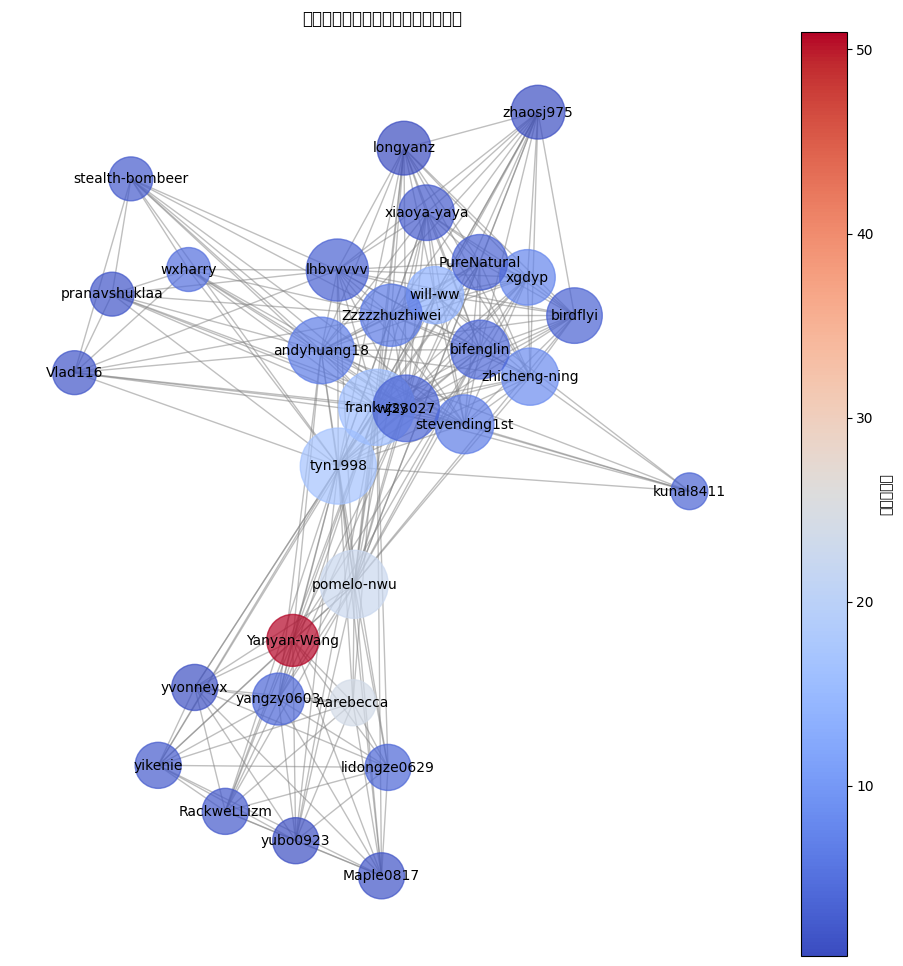

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
import json

# 读取 JSON 文件
file_path = r"C:\Users\王志鸿\Desktop\导论\hw4_data.json"

# 加载 JSON 数据
with open(file_path, 'r', encoding='utf-8') as f:
    data = json.load(f)

# 从 JSON 数据中获取节点和边的信息
nodes = data['nodes']
edges = data['edges']

# 1. 创建社交网络图
G = nx.Graph()

# 将节点信息加入图中，每个节点包含影响力得分
for node in nodes:
    user, influence_score = node
    G.add_node(user, influence_score=influence_score)

# 将边信息加入图中，表示用户之间的连接
for edge in edges:
    user1, user2, strength = edge
    G.add_edge(user1, user2, weight=strength)

# 2. 按照影响力得分给节点着色
influence_scores = [G.nodes[node]['influence_score'] for node in G.nodes]
min_influence_score = min(influence_scores)
max_influence_score = max(influence_scores)
cmap = plt.get_cmap('coolwarm')  # 使用渐变颜色映射（影响力得分）
node_colors = [cmap((score - min_influence_score) / (max_influence_score - min_influence_score)) for score in influence_scores]

# 3. 根据节点度数调整节点大小
node_degrees = [G.degree(node) for node in G.nodes]
node_sizes = [100 * degree for degree in node_degrees]  # 节点大小与度数成正比

# 4. 绘制网络图
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.15, iterations=20)  # 使用spring布局算法

# 绘制节点和边
nx.draw_networkx_edges(G, pos, alpha=0.5, width=1.0, edge_color='gray')
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, cmap=cmap, alpha=0.7)

# 绘制节点标签
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')

# 设置标题
plt.title('社交网络图：用户关系与影响力得分')

# 显示图形
plt.colorbar(plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=min_influence_score, vmax=max_influence_score)), label='影响力得分')
plt.axis('off')  # 关闭坐标轴
plt.show()


#### 可视化结果
- 节点颜色：根据用户的影响力得分，颜色较亮的节点表示该用户在社交网络中的影响力较强，颜色较暗的节点表示影响力较弱。

- 节点大小：根据每个用户的度数（即连接数量）来设置节点的大小。度数较大的节点（与更多用户有连接的用户）会显示得更大，表示其在社交网络中的连接更加广泛。

- 网络结构：通过图中的边和节点布局，我们可以看到社交网络中不同用户之间的连接关系。中心节点通常是网络中的关键人物，拥有较多连接和较强的影响力。

#### 分析
通过这个图，我们可以直观地看到哪些用户在社交网络中最具影响力：
- 影响力得分较高的用户：这些用户通常位于图中的中心位置，且颜色较暖（例如红色），表明他们的影响力较强。

- 度数较高的用户：这些用户的节点较大，表明他们在社交网络中连接了许多其他用户，可能是网络中的关键节点或信息传播的中心。